<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gradient-Descent-intuition" data-toc-modified-id="Gradient-Descent-intuition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gradient Descent intuition</a></span><ul class="toc-item"><li><span><a href="#Preparing-with-helper-functions" data-toc-modified-id="Preparing-with-helper-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preparing with helper functions</a></span></li><li><span><a href="#Seeing-the-final-animation-in-action" data-toc-modified-id="Seeing-the-final-animation-in-action-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Seeing the final animation in action</a></span></li></ul></li><li><span><a href="#Adaline:-The-math-behind-the-train-formula" data-toc-modified-id="Adaline:-The-math-behind-the-train-formula-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adaline: The math behind the train formula</a></span></li><li><span><a href="#Multilayer-Network:-The-math-behind-the-train-formula" data-toc-modified-id="Multilayer-Network:-The-math-behind-the-train-formula-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multilayer Network: The math behind the train formula</a></span></li><li><span><a href="#Gradient-Descent---Visualizing-the-different-flavours-with-Adaline-network" data-toc-modified-id="Gradient-Descent---Visualizing-the-different-flavours-with-Adaline-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Descent - Visualizing the different flavours with Adaline network</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import animation
import seaborn as sns
import time

sns.set_style("darkgrid")

# Gradient Descent intuition

## Preparing with helper functions
In order to show a visual representation of the gradient descent, we need a representation of some cost function $J(w)$, a way to represent the derivative of the cost function at some point based on the tangent line that passes at that point, and... we need to animate this whole process.

I am just doing this for illustration purposes, this is not an implementation of gradient descent.

In [2]:
def j(w):
    return w**2 - 10*w + 30

def derivative(f, x):
    h = 0.1 
    return (f(x + h) - f(x))/h

def draw_cost_function(ax):
    x = np.linspace(0, 10, 1000)
    y = j(x)
    ax.set_ylim([0, 33])
    ax.plot(x, y, 'gray')
    ax.set_ylabel("J (W) - Error function")
    ax.set_xlabel("W")
    
def draw_tangent_line(ax, w):
    x = np.linspace(w - 1, w + 1, 100)
    y = derivative(j, w) * (x - w) + j(w)
    ax.plot(x, y, 'g')
    
def draw_annotations(ax, w, min_w):
    ax.plot(min_w, j(min_w), 'ko')
    ax.plot(w, j(w), 'ro')
    ax.annotate('we are here', xy=(w, j(w)), xytext=(5, 25),
                arrowprops=dict(facecolor='black', shrink=0.001))
    ax.annotate('minimum error', xy=(min_w, j(min_w)), xytext=(1, 1),
                arrowprops=dict(facecolor='black', shrink=0.001))

In [3]:
start_w = 9
minimum_w = 5    
step = 0.5

def animate(i):
    ax.cla()
    
    current_w = start_w - step*i
    
    draw_cost_function(ax)
    draw_tangent_line(ax, current_w)
    draw_annotations(ax, current_w, minimum_w)

In [4]:
plt.rcParams["animation.html"] = "jshtml"
plt.ioff()

fig, ax = plt.subplots(figsize=(6, 6))

final_animation = animation.FuncAnimation(fig,
                                          animate,
                                          frames=int((start_w-minimum_w)/step)+1,
                                          interval=800,
                                          repeat=True)

## Seeing the final animation in action

In [5]:
final_animation

In [6]:
plt.rcParams["animation.html"] = "none"
plt.ion()
fig.clf()

# Adaline: The math behind the train formula


The training process consists in updating connection weights by a $\Delta$ that will increase the prediction ability of the network:

$
w = w + \Delta
$

&nbsp;

Using gradient descent we compute $\Delta$ based on:
- A cost function that expresses how much is the network's error going to be based on a weight value chosen; 
- A learning rate parameter $\mu$ that determines the step size to apply to weight updates.

$
w = w - \mu \cdot \frac{\partial}{\partial w}J(w)
$

&nbsp;

In the context of Adaline we can use Mean Squared Error (MSE) as cost/error function, where $i$ identifies a sample from the training dataset, $y$ identifies the network's prediction and $t$ the target/expected output:

$J(w) = MSE = \frac{1}{n}\sum_{i=1}^{n}(y-t)^2$

$
w = w - \mu \cdot \frac{\partial}{\partial w}\frac{1}{n}\sum_{i} (y - t)^2
$

The derivative of a sum is the sum of the derivatives:

$
\Leftarrow\kern-4pt\Rightarrow w = w - \mu \cdot \frac{1}{n}\sum_{i} \frac{\partial}{\partial w} (y - t)^2
$

Applying the power function rule $f(x) = g(x)^p$ we have $f'(x) = p \cdot g(x)^{p-1} \cdot g'(x)$:

$
\Leftarrow\kern-4pt\Rightarrow w = w - \mu \cdot \frac{1}{n}\sum_{i} 2(y-t)\frac{\partial}{\partial w} (y - t)
$

$y$ is in fact the output of the network, so we can expand it in order to get $w$ explicitly and compute the derivative:

$
\Leftarrow\kern-4pt\Rightarrow w = w - \mu \cdot \frac{1}{n}\sum_{i} 2(y-t)\frac{\partial}{\partial w} (f(wx + b) - t)
$

Adaline's activation function $f(z)$ is the linear function, meaning $f(z)=z$:

$
\Leftarrow\kern-4pt\Rightarrow w = w - \mu \cdot \frac{1}{n}\sum_{i} 2(y-t)\frac{\partial}{\partial w} (wx + b - t)
$

$
\Leftarrow\kern-4pt\Rightarrow w = w - \mu \cdot \frac{1}{n}\sum_{i} 2(y-t) \cdot x
$

&nbsp;

Final formula (for a single weight, for each sample of the dataset):

$
w = w - \mu \cdot 2(y-t) \cdot x
$

Bear in mind there are slightly different versions but they will still be valid. For example one can define MSE as $\frac{1}{n}\sum_{i=1}^{n}(y-t)^2$ 

# Multilayer Network: The math behind the train formula

In [7]:
# TODO

# Gradient Descent - Visualizing the different flavours with Adaline network

From the data processing point of view, there are three gradient types being used in the industry: batch training, mini-batch training and stochastic gradient descent (SGD).

In [8]:
n_samples = 2000

data_dictionary = {
    'x' : np.concatenate((np.random.normal(12, 1, n_samples), np.random.normal(3, 0.5, n_samples)), axis=None),
    'class' : ['blue']*n_samples + ['orange']*n_samples
}

dataset = pd.DataFrame(data_dictionary)

<AxesSubplot:xlabel='x', ylabel='Count'>

<Figure size 432x432 with 0 Axes>

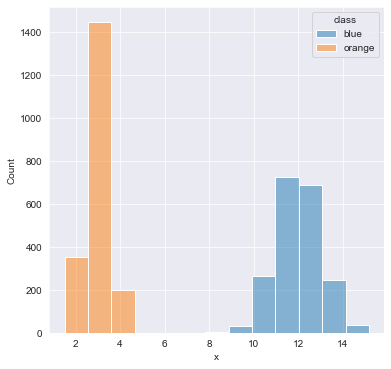

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.histplot(data=dataset, x='x', hue='class', ax=ax)

In [10]:
M = 1 # 1 input node -> 1 feature
N = 1 # 1 neuron -> binary classification problem

initial_W = np.array([[-10],[-10]]) # For the sake of the example

In [11]:
features = ['x']
for f in features:
    dataset[f] = dataset[f]/dataset[f].max()

X = np.asarray(dataset[features]).transpose()
t = np.array([1 if c=='blue' else -1 for c in dataset['class']])

In [12]:
def feed_forward(W, X, f):
    return f(np.dot(np.transpose(W), add_bias_node(X)))

def add_bias_node(X):
    return np.vstack([X, np.ones(X.shape[1])])

def linear(z):
    return z

def threshold(z):
    return np.where(z>=0, 1, -1)

In [13]:
def mse(W, X, t):
    return np.sum((t.reshape(1, -1) - feed_forward(W, X, linear))**2)/len(t)

In [14]:
limit = 10
n_points = 100
xs = np.linspace(-limit, limit, n_points)
ys = np.linspace(-limit, limit, n_points)
W0, W1 = np.meshgrid(xs, ys)

mse_list = []
for i in ys:
    for j in xs:
        mse_list.append(mse(np.array([[j],[i]]), X, t))
Z = np.reshape(np.array(mse_list), (n_points, n_points))

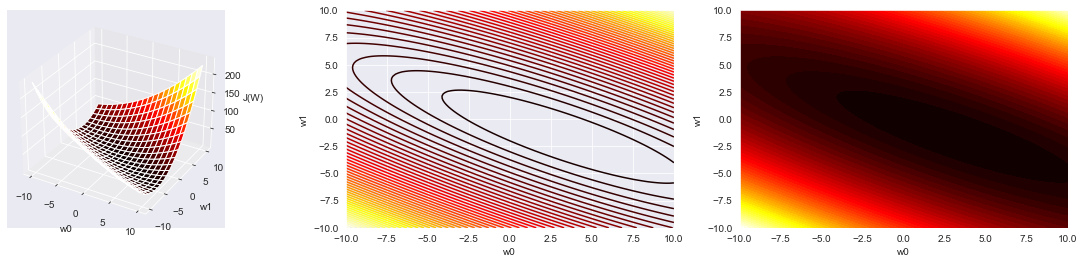

In [15]:
fig = plt.figure(figsize=(20, 4))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)


ax1.plot_surface(W0, W1, Z,
                 rstride=5, 
                 cstride=5,
                 cmap='hot')
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('J(W)')

ax2.contour(W0, W1, Z, 50, cmap='hot')
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')

ax3.contourf(W0, W1, Z, 50, cmap='hot')
ax3.set_xlabel('w0')
ax3.set_ylabel('w1')
plt.ion()

In [16]:
def train_single_epoch(W, inputs, targets, lr, size):
    selector = np.array(range(len(targets)),int)
    np.random.shuffle(selector)
    _inputs = inputs[:,selector]
    _targets = targets[selector]
    for x, t, _ in zip(_inputs.transpose(), _targets, range(size)):
        y = feed_forward(W, x.reshape(1, -1).transpose(), linear)
        errors = np.subtract(y, t)
        x_with_bias = add_bias_node(x.reshape(-1, 1))
        gradients = np.dot(x_with_bias, errors.transpose())
        deltas = lr * gradients
        W = W - deltas
    return W


def train(W, X, t, lr, epochs, mode):
    start = start = time.time()
    if mode == 'full_batch':
        size = n_samples
        _epochs = epochs
    elif mode == 'mini_batch':
        size = 32
        _epochs = epochs*2
    elif mode == 'sgd':
        size = 1
        _epochs = epochs*20
        
    costs = []
    w0 = [W[0][0]]
    w1 = [W[1][0]]
    for e in range(_epochs):
        costs.append(mse(W, X, t))
        W = train_single_epoch(W, X, t, lr, size)
        w0.append(W[0][0])
        w1.append(W[1][0])
    
    end = time.time()
    return w0, w1, costs, end-start

In [17]:
def prepare_plots(i, ax, w0, w1, costs, epochs):    
    ax[0][i].plot(range(epochs), costs[:epochs])
    ax[0][i].set_title("Loss function evolution throughout the first {epochs} training epochs")
    ax[0][i].set_xlabel('number of epochs')
    ax[0][i].set_ylabel('J(W)')
    ax[0][i].set_ylim([0, 300])
    
    ax[1][i].contour(W0, W1, Z, 70, cmap='hot')
    ax[1][i].plot(w0, w1, marker='o', lw=0.5, markersize=3)
    ax[1][i].set_title(f"Loss function evolution throughout training epochs in the weight space")
    ax[1][i].set_xlabel('w0')
    ax[1][i].set_ylabel('w1')
    
    sns.histplot(data=dataset, x='x', hue='class', ax=ax[2][i])
    ax[2][i].set_title(f"Visualizing the decision boundary (in red)")
    y = list(range(1500))
    x = [-w1[-1]/w0[-1] for i in y]
    ax[2][i].plot(x,y,'r')


def annotate_fig_headers(accuracies, time_elapsed_list):
    locations = { 
        'full_batch': {'x': 0.18, 'y': 1.0},
        'mini_batch': {'x': 0.47, 'y': 1.0},
        'sgd': {'x': 0.77, 'y': 1.0}
    }
    
    plt.figtext(locations['full_batch']['x'],
                locations['full_batch']['y'],
                "Full Batch Training",
                fontsize=16)
    plt.figtext(locations['mini_batch']['x'],
                locations['mini_batch']['y'],
                "Mini Batch Training",
                fontsize=16)
    plt.figtext(locations['sgd']['x'],
                locations['sgd']['y'],
                "SGD Training",
                fontsize=16)
    
    for k, accuracy, elapsed_time in zip(locations.keys(), accuracies, time_elapsed_list):
        plt.figtext(locations[k]['x'],
                    locations[k]['y'] - 0.03,
                    f"Accuracy: {accuracy}",
                    fontsize=16)
        plt.figtext(locations[k]['x'],
                    locations[k]['y'] - 0.06,
                    f"Elapsed time: {elapsed_time:.2f} secs",
                    fontsize=16)
    
    
def get_accuracy(t, y):
    correct_predictions = np.count_nonzero(t-y==0)
    return correct_predictions/len(t)

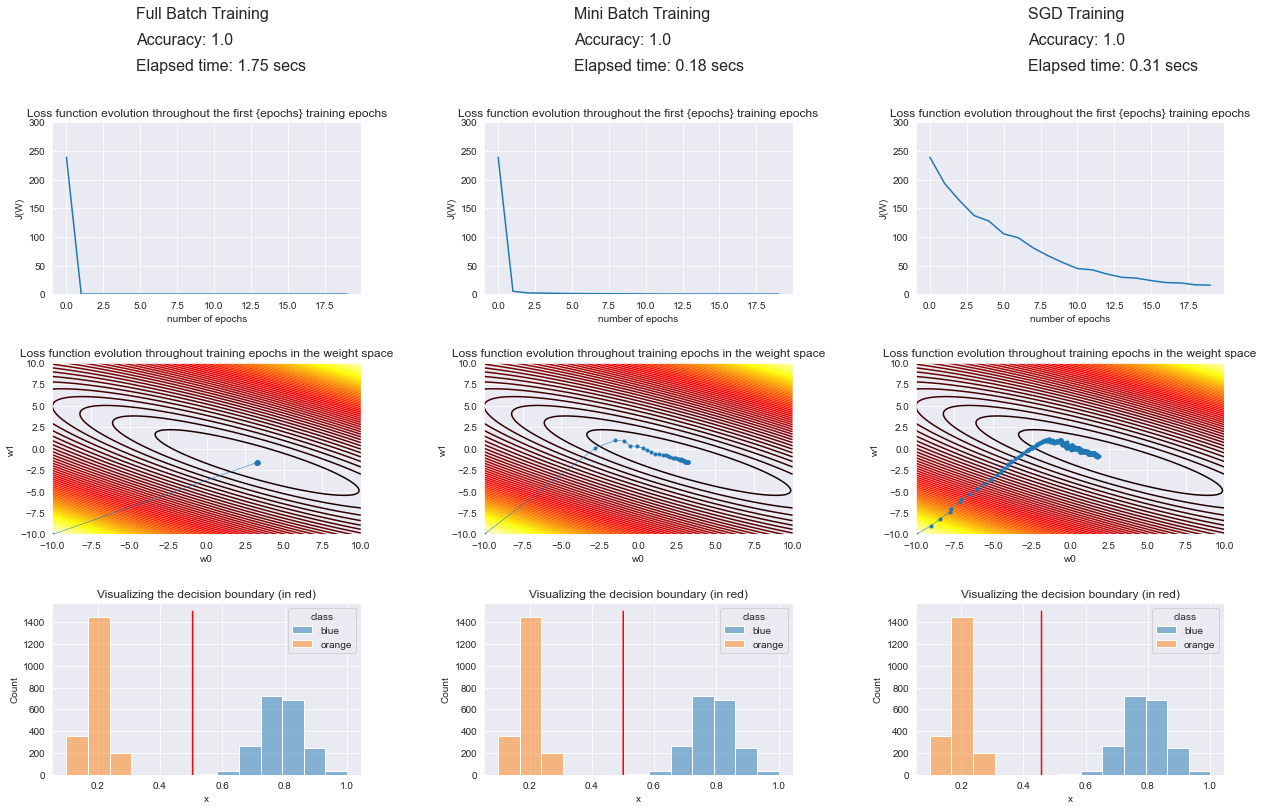

In [18]:
modes = ['full_batch', 'mini_batch', 'sgd']
accuracies = []
time_elapsed_list = []

fig, ax = plt.subplots(figsize=(21, 12),
                       nrows=3,
                       ncols=3)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

epochs = 20
learning_rate = 0.05
for i, mode in enumerate(modes):
    w0, w1, costs, time_elapsed = train(initial_W, X, t, learning_rate, epochs, mode)
    y = feed_forward([[w0[-1]],[w1[-1]]], X, threshold)
    accuracy = get_accuracy(t, y)
    prepare_plots(i, ax, w0, w1, costs, epochs)
    accuracies.append(accuracy)
    time_elapsed_list.append(time_elapsed)
annotate_fig_headers(accuracies, time_elapsed_list)